# Hybrid stochastic-continuous simulation of intracellular damage
This notebook lays the groundwork for our planned math. model of intracellular damage dynamics. We first focus on the effects of membrane rupture (as indicated by Ca2+ concentration) and DNA double strand breaks (as indicated by foci numbers). The model is based on the following reactions:

In [2]:
import numpy as np
from gillespy2 import Model, Species, Parameter, Reaction
from matplotlib import pyplot as plt

In [3]:
class CellDamages(Model):
def __init__(self, parameter_values=None):
    # Initialize the model.
    Model.__init__(self, name="Cellular damages")

    # Define parameters. Values are inspired from experiments in Weigelin et al. Nature Comm. 2021.
    focirepairrate = Parameter(name='focirepairrate', expression=.5)
    hitrate = Parameter(name='hitrate', expression=.5)
    membranerepairrate = Parameter(name='membranerepairrate', expression=100)
    focidamagerate = Parameter(name='focidamagerate', expression=6)

    self.add_parameter([focirepairrate, hitrate, membranerepairrate, focidamagerate])

    # Define molecular species.
    ca2 = Species(name='Ca2', initial_value=0, mode='discrete')
    foci = Species(name='foci', initial_value=0, mode='discrete')
    self.add_species([ca2, foci])

    # Define reactions.
    # membrane rupture
    rupture = Reaction(name='membrane_rupture', reactants={}, products={ca2: 50}, rate=hitrate)
    membranerepair = Reaction(name='membrane_repair', reactants={ca2: 1}, products={}, rate=membranerepairrate)
    focidamage = Reaction(name='foci_damage', reactants={ca2: 1}, products={ca2: 1, foci: 1}, rate=focidamagerate)
    focirepair = Reaction(name='foci_repair', reactants={foci: 1}, products={}, rate=focirepairrate)
    # propensity_function="alpha2/(1+pow(U,gamma))")

    self.add_reaction([rupture, membranerepair, focidamage, focirepair])
    self.timespan(np.linspace(0, 50, 1001))

([<matplotlib.axis.XTick at 0x212ee5b8170>,
 [Text(0, 0, '0'), Text(24, 0, '24'), Text(48, 0, '48')])

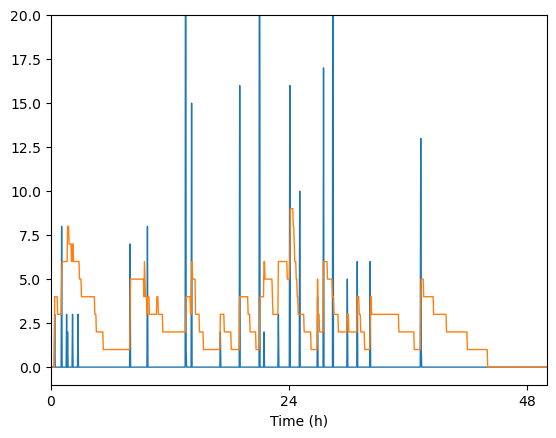

In [4]:
    model = CellDamages()
results = model.run()
plt.plot(results.data[0]['time'], results.data[0]['Ca2'], label=r'$c_{{\rm Ca}^{2+}}$', lw=1)
plt.plot(results.data[0]['time'], results.data[0]['foci'], label=r'$n_{\rm foci}$', lw=1)
plt.xlabel('Time (h)')
plt.ylabel('')
plt.ylim(-1, 20)
plt.xlim(0, 50)
plt.xticks([0, 24, 48])